In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Define a Grid where the cells with obstacles are occupied
Example, a grid of 40x60 in a rectangular map of 2x3 m^2. The obstacles are random.

NOTE: for the workshop, you will not fill them randomly. It will be depending on the obstacles.

In [35]:
n, m = 4,6  # number of rows and columns respectively.

In [36]:
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((4,6))

# Random obstacles for this example. 
np.random.seed(0)  # You can remove the random seed if you want to test different random grids.
grid = np.random.rand(4, 6)
threshold = 0.8
grid[grid > threshold] = 1
grid[grid<= threshold] = 0

grid

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0.]])

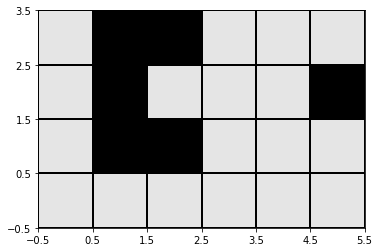

In [154]:
# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));

draw_grid()

## 2. Create a graph to represent the grid
Every cell is a node, and adjecent vertices are connected by edges.

In [73]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  24
Number of nodes after removing obstacles:  18
Nodes [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 3), (1, 4), (1, 5), (2, 0), (2, 2), (2, 3), (2, 4), (3, 0), (3, 3), (3, 4), (3, 5)]


## Plot the graph



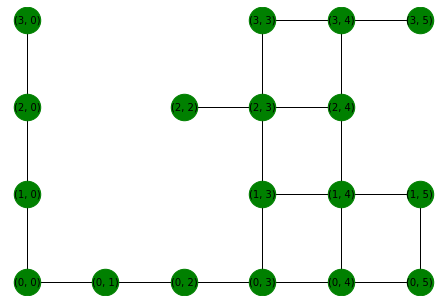

In [116]:
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")

### Overlapping the grid and graph

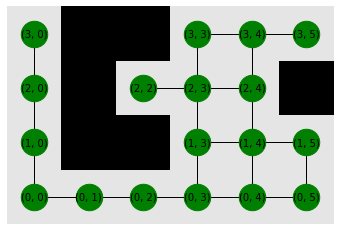

In [161]:
# Plot grid
draw_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")


# 3. Find a path between a pair of nodes

For example: Start at node (3.5) and move to node (3.0). Find a path using the Breadth-First-Search algorithm

In [164]:
start_node =  (3, 5)
end_node = (3,0)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(H, source=start_node)


[(3, 5), (3, 4), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0)]


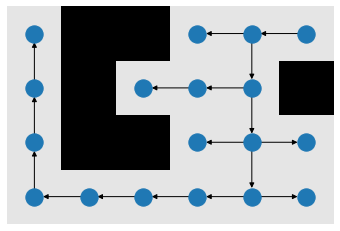

In [175]:
# plot the result of BSF
draw_grid()
nx.draw(bfs_tree, pos = pos)

In [ ]:

# Pick the last element and iterate through its predecessors
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

## Plot the result

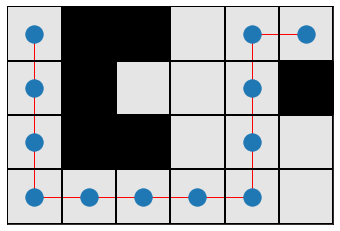

In [189]:
# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, nodes=path, edgelist=E, pos=pos,edge_color='r')
